In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf71a5a8f84b6eb9b6301cd4a5dfafb4


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


603

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | severo-kurilsk
Processing Record 2 of Set 13 | huarmey
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | cherskiy
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | alofi
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | hilo
Processing Record 9 of Set 13 | mingguang
Processing Record 10 of Set 13 | nainpur
Processing Record 11 of Set 13 | bitam
Processing Record 12 of Set 13 | carnarvon
Processing Record 13 of Set 13 | novoagansk
Processing Record 14 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 13 | axim
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | kapaa
Processing Record 18 of Set 13 | bouloupari
Processing Record 19 of Set 13 | jamestown
Processing Record 20 of Set 13 | luderitz
Processing Record 21 of Set 13 | koslan
Processing Record 22 of Set 13 | netarhat
Pro

City not found. Skipping...
Processing Record 35 of Set 16 | la palma
Processing Record 36 of Set 16 | georgetown
Processing Record 37 of Set 16 | pangnirtung
Processing Record 38 of Set 16 | misasi
Processing Record 39 of Set 16 | camargo
Processing Record 40 of Set 16 | pevek
Processing Record 41 of Set 16 | villefranche-de-rouergue
Processing Record 42 of Set 16 | hobart
Processing Record 43 of Set 16 | calabozo
Processing Record 44 of Set 16 | ornskoldsvik
Processing Record 45 of Set 16 | abu samrah
Processing Record 46 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 16 | bagepalli
Processing Record 48 of Set 16 | lima
Processing Record 49 of Set 16 | phan thiet
Processing Record 50 of Set 16 | taloda
Processing Record 1 of Set 17 | soria
Processing Record 2 of Set 17 | nurota
Processing Record 3 of Set 17 | abnub
Processing Record 4 of Set 17 | kavaratti
Processing Record 5 of Set 17 | vidim
Processing Record 6 of Set 17 | vorontsovka
Pro

Processing Record 22 of Set 20 | vardo
Processing Record 23 of Set 20 | iqaluit
Processing Record 24 of Set 20 | bitung
Processing Record 25 of Set 20 | cayenne
Processing Record 26 of Set 20 | puerto suarez
Processing Record 27 of Set 20 | impfondo
Processing Record 28 of Set 20 | usinsk
Processing Record 29 of Set 20 | srednekolymsk
Processing Record 30 of Set 20 | kendari
Processing Record 31 of Set 20 | sajobabony
Processing Record 32 of Set 20 | lamidan
City not found. Skipping...
Processing Record 33 of Set 20 | garm
City not found. Skipping...
Processing Record 34 of Set 20 | shirokiy
Processing Record 35 of Set 20 | khipro
Processing Record 36 of Set 20 | sterling
Processing Record 37 of Set 20 | umred
Processing Record 38 of Set 20 | el tejar
Processing Record 39 of Set 20 | cidreira
Processing Record 40 of Set 20 | awbari
Processing Record 41 of Set 20 | kupang
Processing Record 42 of Set 20 | gorontalo
Processing Record 43 of Set 20 | eyl
Processing Record 44 of Set 20 | nuu

Processing Record 5 of Set 24 | turukhansk
Processing Record 6 of Set 24 | vicam
Processing Record 7 of Set 24 | portland
Processing Record 8 of Set 24 | campanha
Processing Record 9 of Set 24 | guarapari
Processing Record 10 of Set 24 | anadyr
Processing Record 11 of Set 24 | namanyere
Processing Record 12 of Set 24 | okato
Processing Record 13 of Set 24 | vegueta
Processing Record 14 of Set 24 | dibulla
Processing Record 15 of Set 24 | avera
Processing Record 16 of Set 24 | unye
City not found. Skipping...
Processing Record 17 of Set 24 | palmer
Processing Record 18 of Set 24 | oron
Processing Record 19 of Set 24 | wilmington
Processing Record 20 of Set 24 | dzhusaly
City not found. Skipping...
Processing Record 21 of Set 24 | stokmarknes
Processing Record 22 of Set 24 | partizansk
Processing Record 23 of Set 24 | bud
Processing Record 24 of Set 24 | muscle shoals
Processing Record 25 of Set 24 | dalian
Processing Record 26 of Set 24 | aksu
Processing Record 27 of Set 24 | husavik
Pr

In [8]:
len(city_data)

553

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,57.72,87,42,9.89,RU,2022-08-10 22:49:00
1,Huarmey,-10.0681,-78.1522,65.14,77,11,9.40,PE,2022-08-10 22:49:01
2,Atuona,-9.8000,-139.0333,77.40,75,12,23.00,PF,2022-08-10 22:49:01
3,Cherskiy,68.7500,161.3000,64.20,57,0,1.66,RU,2022-08-10 22:49:01
4,Rikitea,-23.1203,-134.9692,73.26,72,93,21.56,PF,2022-08-10 22:48:58
5,Alofi,-19.0595,-169.9187,80.49,69,75,11.50,NU,2022-08-10 22:49:02
6,Punta Arenas,-53.1500,-70.9167,39.31,87,0,9.22,CL,2022-08-10 22:49:01
7,Hilo,19.7297,-155.0900,90.28,70,75,8.05,US,2022-08-10 22:44:40
8,Mingguang,32.7802,117.9638,84.36,78,61,5.03,CN,2022-08-10 22:49:02
9,Nainpur,22.4333,80.1167,72.90,97,100,9.73,IN,2022-08-10 22:49:03


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2022-08-10 22:49:00,50.6789,156.1250,57.72,87,42,9.89
1,Huarmey,PE,2022-08-10 22:49:01,-10.0681,-78.1522,65.14,77,11,9.40
2,Atuona,PF,2022-08-10 22:49:01,-9.8000,-139.0333,77.40,75,12,23.00
3,Cherskiy,RU,2022-08-10 22:49:01,68.7500,161.3000,64.20,57,0,1.66
4,Rikitea,PF,2022-08-10 22:48:58,-23.1203,-134.9692,73.26,72,93,21.56
5,Alofi,NU,2022-08-10 22:49:02,-19.0595,-169.9187,80.49,69,75,11.50
6,Punta Arenas,CL,2022-08-10 22:49:01,-53.1500,-70.9167,39.31,87,0,9.22
7,Hilo,US,2022-08-10 22:44:40,19.7297,-155.0900,90.28,70,75,8.05
8,Mingguang,CN,2022-08-10 22:49:02,32.7802,117.9638,84.36,78,61,5.03
9,Nainpur,IN,2022-08-10 22:49:03,22.4333,80.1167,72.90,97,100,9.73


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

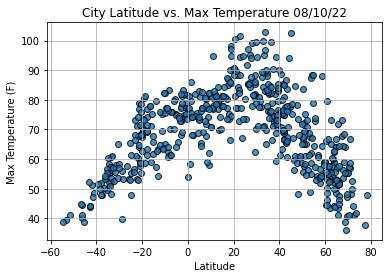

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

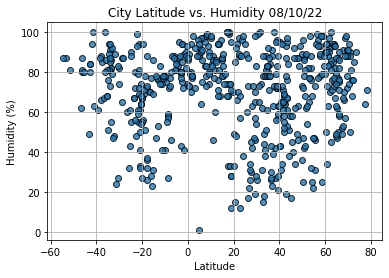

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

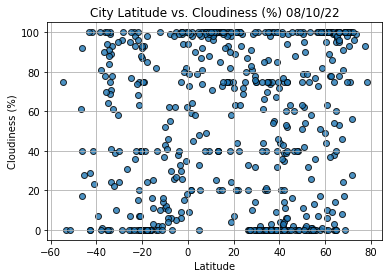

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

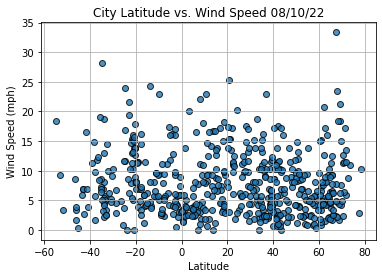

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"The r-value is {r_value:.3f}")

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2022-08-10 22:49:00,50.6789,156.1250,57.72,87,42,9.89
3,Cherskiy,RU,2022-08-10 22:49:01,68.7500,161.3000,64.20,57,0,1.66
7,Hilo,US,2022-08-10 22:44:40,19.7297,-155.0900,90.28,70,75,8.05
8,Mingguang,CN,2022-08-10 22:49:02,32.7802,117.9638,84.36,78,61,5.03
9,Nainpur,IN,2022-08-10 22:49:03,22.4333,80.1167,72.90,97,100,9.73


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

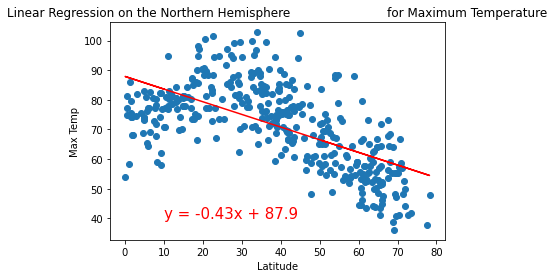

The r-value is -0.628


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


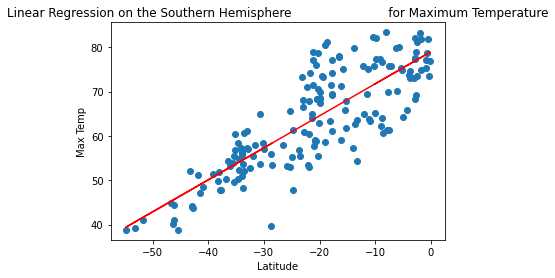

The r-value is 0.828


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

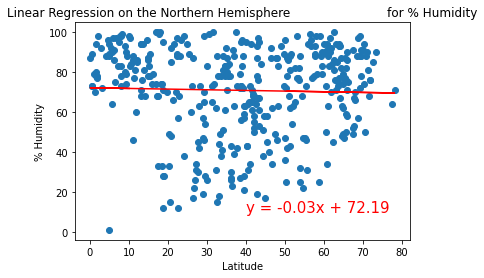

The r-value is -0.031


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

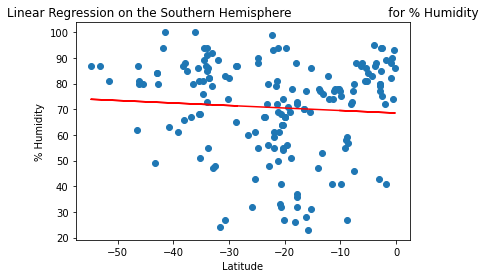

The r-value is -0.069


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

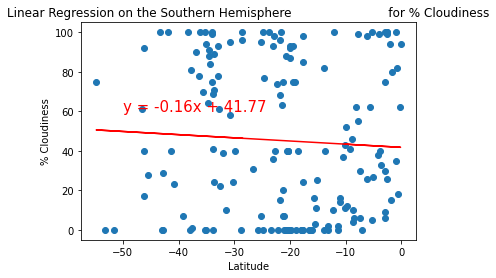

The r-value is -0.055


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

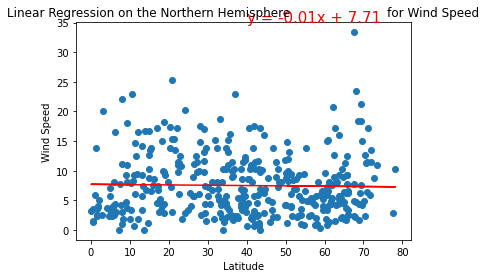

The r-value is -0.021


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

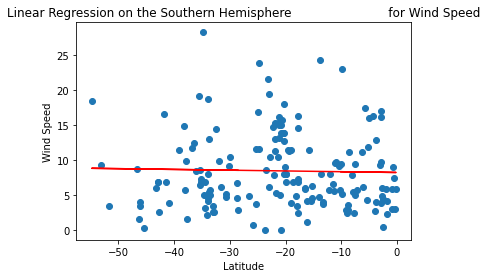

The r-value is -0.027


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))